In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
# fix a random seed for reproducibility
np.random.seed(9)

# user inputs
nb_epoch = 5
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

In [4]:
# split the mnist data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

11493376/11490434 [==============================] - 1s 0us/step
[INFO] train data shape: (60000, 28, 28)
[INFO] test data shape: (10000, 28, 28)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [0]:
# reshape the dataset
trainData = trainData.reshape(train_size, v_length)
testData = testData.reshape(test_size, v_length)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

In [6]:
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 784)
[INFO] test data shape: (10000, 784)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [0]:
#  one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

In [0]:
# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [14]:
# summarize the model
model.summary()

# compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# fit the model
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, nb_epoch=nb_epoch, verbose=2)

# print the history keys
print(history.history.keys())

# evaluate the model
scores = model.evaluate(testData, mTestLabels, verbose=0)

W0807 13:52:03.899309 139906789922688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 13:52:03.943327 139906789922688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys
W0807 13:52:04.248770 139906789922688 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 8s - loss: 0.2612 - acc: 0.9216 - val_loss: 0.1066 - val_acc: 0.9670
Epoch 2/5
 - 7s - loss: 0.1066 - acc: 0.9675 - val_loss: 0.0851 - val_acc: 0.9720
Epoch 3/5
 - 7s - loss: 0.0755 - acc: 0.9765 - val_loss: 0.0730 - val_acc: 0.9777
Epoch 4/5
 - 7s - loss: 0.0587 - acc: 0.9815 - val_loss: 0.0652 - val_acc: 0.9786
Epoch 5/5
 - 7s - loss: 0.0488 - acc: 0.9839 - val_loss: 0.0654 - val_acc: 0.9800
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


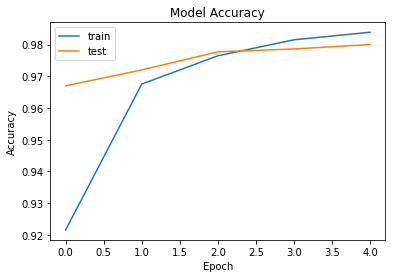

In [15]:
# history plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

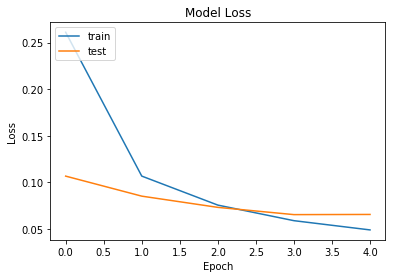

In [16]:
# history plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [17]:
# print the results
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))

[INFO] test score - 0.06543181374470004
[INFO] test accuracy - 0.98


In [19]:
# grab some test images from the test data
test_images = testData[1:5]

# reshape the test images to standard 28x28 format
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print("[INFO] test images shape - {}".format(test_images.shape))

[INFO] test images shape - (4, 28, 28)


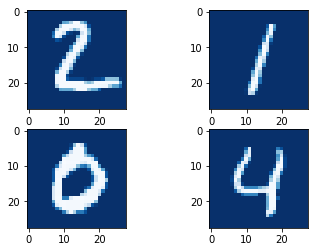

In [20]:
# loop over each of the test images
for i, test_image in enumerate(test_images, start=1):
	# grab a copy of test image for viewing
	org_image = test_image
	
	# reshape the test image to [1x784] format so that our model understands
	test_image = test_image.reshape(1,784)
	
	# make prediction on test image using our trained model
	prediction = model.predict_classes(test_image, verbose=0)
	
	# display the prediction and image
	""""print("[INFO] I think the digit is - {}".format(prediction[0]))"""
	plt.subplot(220+i)
	plt.imshow(org_image, cmap=plt.get_cmap('Blues_r'))

plt.show()